In [1]:
from GPEnv import GPEnv
from train import train, validate
from model import MyModel
import torch
import matplotlib.pyplot as plt

In [2]:
#TODO: predict variance
model = MyModel(2,1,{
    'prelstm' : [128],
    'lstm_cell_size' : 128,
    'postlstm' : []#[64, 32]
}).cuda()


In [10]:
model = torch.load('hposimple1')

In [11]:
opt = torch.optim.Adam(model.parameters(), lr=5e-5) #4e-4


In [12]:
model(torch.tensor([[0.5, 0]]).cuda(), None)

(tensor([[0.0032]], device='cuda:0', grad_fn=<SigmoidBackward>),
 tensor([[0.9672]], device='cuda:0', grad_fn=<AddmmBackward>),
 (tensor([[[-0.3149,  0.3946,  0.5414, -0.0153,  0.2291, -0.4799,  0.2608,
             0.5244, -0.1804, -0.4252, -0.4694, -0.5543, -0.1199,  0.1159,
             0.6361,  0.1772, -0.1424,  0.5044,  0.4748, -0.3647, -0.3612,
             0.2253,  0.0463, -0.2367,  0.0425, -0.4260, -0.3491, -0.2106,
             0.1556, -0.3615,  0.1084, -0.3915,  0.2386,  0.2935,  0.4883,
            -0.1162, -0.4854, -0.4134, -0.3960,  0.0594,  0.1795,  0.5850,
             0.0534,  0.5141, -0.5588, -0.5560, -0.4066,  0.4371,  0.3165,
            -0.2182, -0.3429,  0.4248, -0.3054, -0.0986, -0.1397, -0.0681,
             0.6596,  0.0592, -0.3955,  0.1683, -0.0955, -0.0341, -0.1875,
            -0.0652,  0.2324,  0.6095, -0.0246,  0.5951, -0.2629, -0.0807,
             0.4403,  0.4517, -0.3891, -0.2264, -0.4737,  0.1346,  0.2644,
             0.6044, -0.3757, -0.2937, -0.4118,

In [13]:
#10,15,15,32
train(100, 8, 64, 256, 20, model, 0.05, 0.95, opt, 'cuda')
#None

Bigstep:  0
Loss: 0.40104806423187256 -0.018125776201486588
Loss: 0.34679555892944336 -0.21017135679721832
Loss: 0.36601653695106506 -0.7704151272773743
Loss: 0.34952428936958313 -0.5529991984367371
Loss: 0.34491682052612305 -0.5640881657600403
Loss: 0.257053941488266 -0.35665062069892883
Loss: 0.3375386893749237 -0.8207054138183594
Policy Reward: tensor(1.0709, device='cuda:0')
Trajectory:  ['0.01', '0.99', '0.15', '0.17', '0.24', '0.17', '0.30', '0.30', '0.42', '0.52', '0.53', '0.48', '0.46', '0.48', '0.48', '0.47', '0.41', '0.32', '0.23']
Last Action:  tensor([0.2288, 0.0753, 0.0526, 0.6747, 0.0054, 0.3281, 0.0069, 0.3240, 0.0757,
        0.0054], device='cuda:0')
Loss: 0.33930671215057373 -0.2736586034297943
Loss: 0.3165954351425171 -0.8368289470672607
Loss: 0.314645379781723 -0.8934194445610046
Loss: 0.37905406951904297 -0.7121289372444153
Loss: 0.32926830649375916 -0.2754681706428528
Loss: 0.3017456829547882 -0.3414854109287262
Loss: 0.2810101807117462 -0.7883521318435669
Policy 

In [14]:
#torch.save(model, 'hposimple3')


Policy Reward: tensor(1.3462, device='cuda:0')
Trajectory:  ['0.13', '1.00', '0.56', '0.02', '0.40', '0.26', '0.29', '0.38', '0.44', '0.56', '0.57', '0.67', '0.78', '0.50', '0.25', '0.10', '0.11', '0.14', '0.15']
Last Action:  tensor([0.1494, 0.5015, 0.9240, 0.9600, 0.6349, 0.5174, 0.1337, 0.3088, 0.2662,
        0.2339], device='cuda:0')


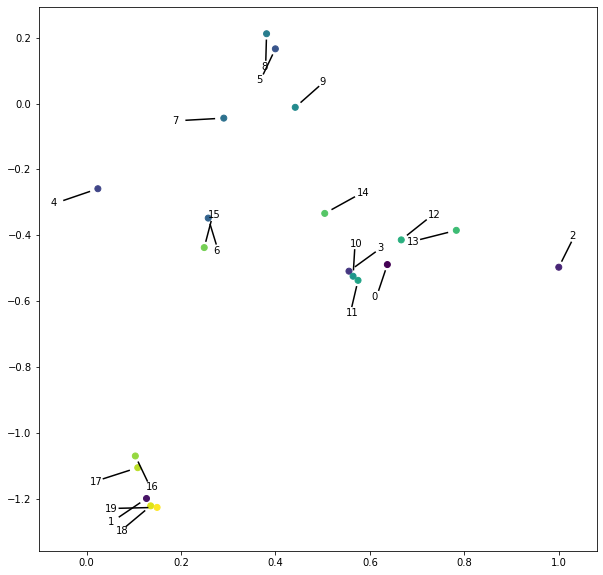

In [15]:
plt.figure(figsize=(10,10))
validate(1, 10, 20, model, 'cuda', render=True)

Policy Reward: tensor(1.1745, device='cuda:0')
Trajectory:  ['0.05', '1.00', '0.72', '0.61', '0.61', '0.45', '0.50', '0.49', '0.55', '0.58', '0.57', '0.77', '0.83', '0.59', '0.40', '0.22', '0.19', '0.22', '0.20']
Last Action:  tensor([0.2039, 0.7268, 0.6978, 0.9998, 0.3892, 0.4775, 0.5315, 0.2118, 0.8875,
        0.3627], device='cuda:0')


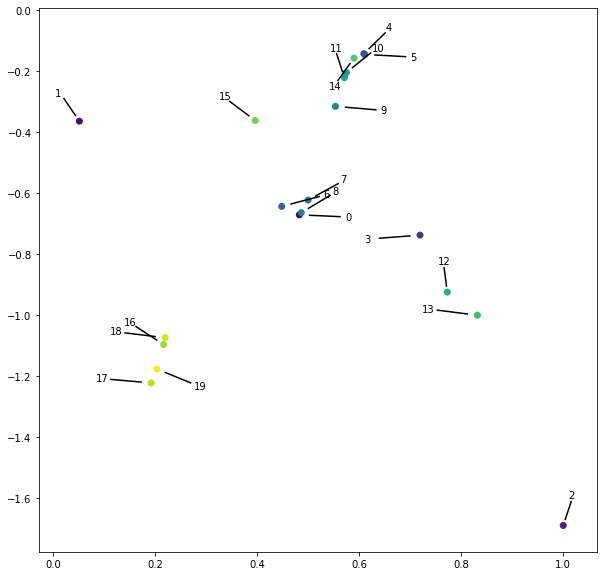

In [16]:
plt.figure(figsize=(10,10))
validate(1, 10, 20, model, 'cuda', render=True)

In [44]:
from scipy.stats import norm, multivariate_normal
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 100)
x1 = np.linspace(-5, 0, 100)
x2 = np.linspace(0, 5, 100)

K = norm.pdf(10*np.abs(np.subtract(*np.meshgrid(x, x))))

In [56]:
y = multivariate_normal.rvs(np.zeros(100, dtype=np.float), K, size=2)

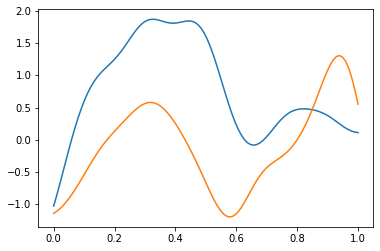

In [57]:
plt.plot(x, y[0])
plt.plot(x, y[1])

In [4]:

[1,2,3][1:]

[2, 3]

In [45]:
K = torch.empty((3,10,10))
for i in range(3):
    K[i] = torch.eye(10) * (i+1)**2
mean = torch.ones((3,10)) * torch.tensor([-1,1,10]).view(-1, 1)
dist = torch.distributions.multivariate_normal.MultivariateNormal(mean, K)

ValueError: Array 'mean' must be a vector of length 30.

In [37]:
s = dist.sample()

In [42]:
((s[2]-10)**2).mean()

tensor(11.2609)

In [10]:


env = GPEnv()
env.reset()

tensor([ 0.5000, -0.4685])

In [14]:
env.step(torch.tensor([[0.5]], dtype=torch.float))


Action:  tensor([[0.5000]])
y:  [[-0.46851146]]


(tensor([ 0.5000, -0.4685]), 3.5108876300649072e-06, False, {})